# House Prices - Advanced Regression Techniques
(House Prices - Advanced Regression Techniques)

- Source: [Dataset in Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - This is a dataset de **competition**
    - There is a base with the **description of each column (data_description.txt)**

## Step 1: Data Collection

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split
from sklearn.model_selection import train_test_split

# Importing the Linear Regression
from sklearn.linear_model import LinearRegression
# Importing the Tree Regression
from sklearn import tree
# Importing the KNN
from sklearn.neighbors import KNeighborsRegressor

# Importing the Absolute average error
from sklearn.metrics import mean_absolute_error
# Importing the Average squared error
from sklearn.metrics import mean_squared_error

In [2]:
# Importing and visualizing the train dataset
base = pd.read_csv("train.csv")
base.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Data Cleaning

In [3]:
# Retorning the shape 
base.shape

(1460, 81)

In [4]:
# Informations
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Viewing the number of empty values - Percentage
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [6]:
# Showing columns with more than 10% empty values to eliminate them
eliminate = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminate

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
# Eliminating these columns
base = base.drop(eliminate,axis=1)

# axis= 1 - column

## Step 3: Data Exploration and Visualization

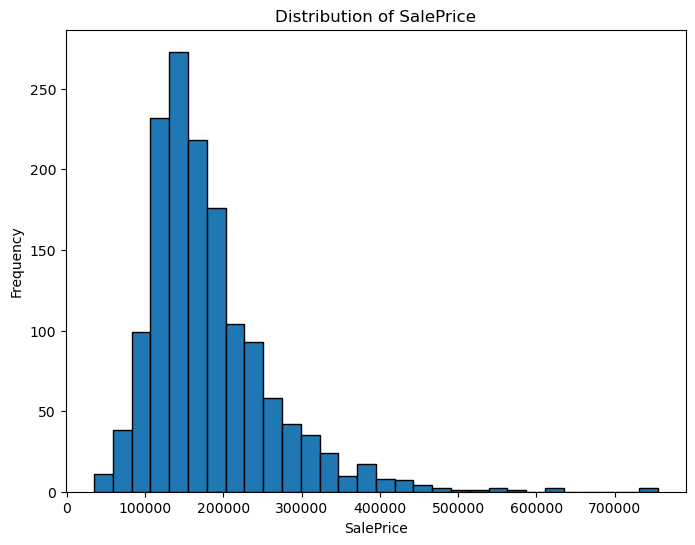

In [8]:
# Visualizing the distribution of the target variable (SalePrice)

plt.figure(figsize=(8, 6))
plt.hist(base['SalePrice'], bins=30, edgecolor='k')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')

plt.show()


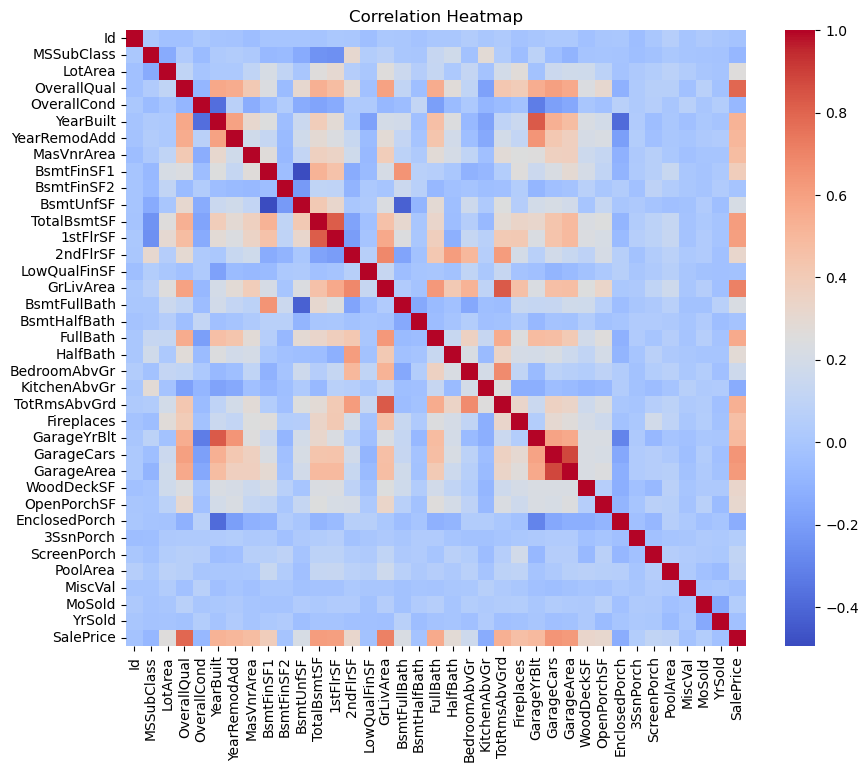

In [9]:
# Selecting only numeric columns for the correlation heatmap
numeric_columns = base.select_dtypes(include=['int64', 'float64']).columns

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(base[numeric_columns].corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

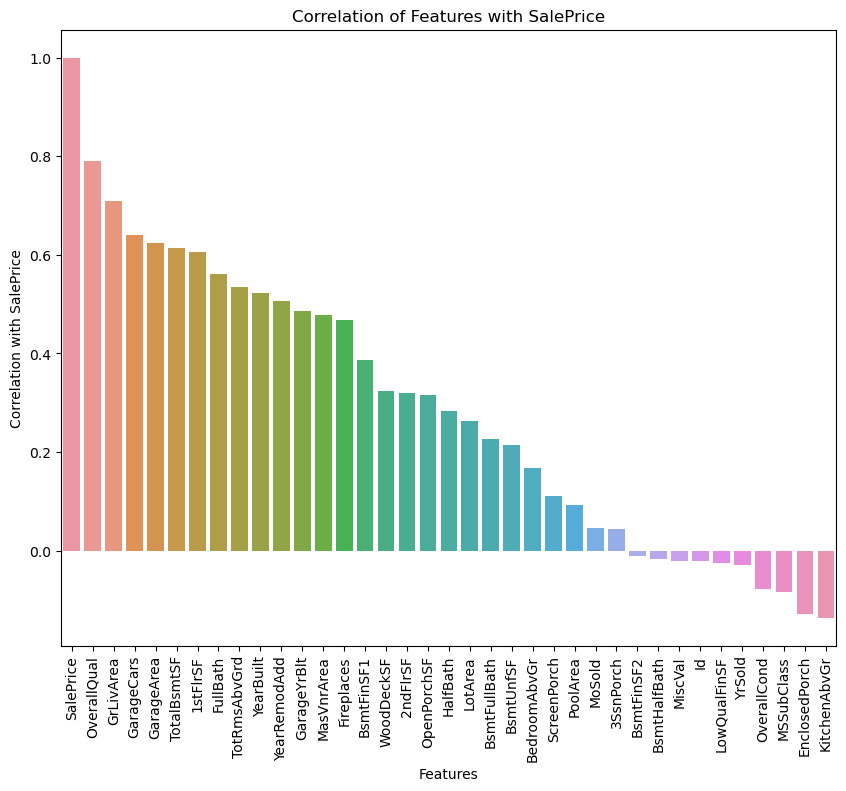

In [10]:
# Correlation with SalePrice
correlation_with_saleprice = base.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Plotting correlation between SalePrice and other columns
numeric_columns = base.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_saleprice.index, y=correlation_with_saleprice)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with SalePrice')
plt.title('Correlation of Features with SalePrice')
plt.show()


## Step 4: Feature Engineering

- The goal is to create a first model to check how wrong we are and then plan how to improve. For that:
    - **Eliminate the text columns**
    - **Handle the empty values**
    - **Choose some algorithms to test and an error evaluation method**

In [11]:
# Selecting only numeric columns
column = base.columns[base.dtypes != "object"]
column

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
# And creating a new base with these values
base2 = base.loc[:, column]
base2.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
# Checking empty values
base2.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [14]:
# Replacing empty values with -1
base2 = base2.fillna(-1)

# -1 is used to show that the information did not exist

- This will be the baseline to start with.


## Step 5: Model Selection

- Train and Test data
- https://scikitlearn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [15]:
# Selecting x and y
X = base2.drop("SalePrice", axis=1)
y = base2.SalePrice

In [16]:
# Separating the base into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- The next step is to select the algorithms that will be used. Start with the simplest algorithms like:
    - Linear Regression
        - https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Tree Regression
        - https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

## Step 6: Model Training


### Linear Regression

In [17]:
# Creating the Regressor and Fitting it with the Training Data
reg_lr = LinearRegression().fit(X_train, y_train)

# reg_lr - regressor of linear regression model

In [18]:
# Making the forecast for test data
y_lr = reg_lr.predict(X_test)

### Tree Regression

In [19]:
# Creating the Regressor and Fitting it with the Training Data
reg_tr = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# reg_tr - regressor of tree regression model

In [20]:
# Predicting
y_tr = reg_tr.predict(X_test)

### KNN

In [21]:
# Creating the Regressor and Fitting it with the Training Data
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

# reg_rn - regressor of KNN model

In [22]:
# Predicting
y_knn = reg_knn.predict(X_test)

## Step 7: Model Evaluation


### Absolute and Squared error

- Evaluate this data, using both the absolute and squared error:
    - Absolute average error
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Average squared error
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [23]:
# Evaluating the linear regression error
print(mean_absolute_error(y_test, y_lr))
print(mean_squared_error(y_test, y_lr))

23763.187393065007
1533982883.4448318


In [24]:
# Tree Regression
print(mean_absolute_error(y_test, y_tr))
print(mean_squared_error(y_test, y_tr))

27580.78838174274
2530245114.701245


In [25]:
# KNN
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


### Visualization

- Visually plot the relationship of y_test with the predictions made.
    

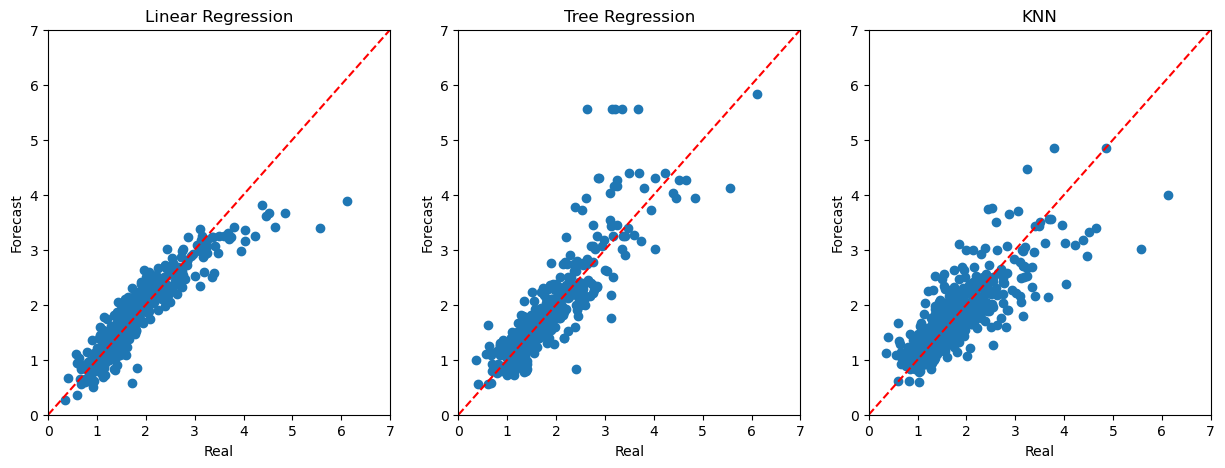

In [26]:
# Creating the chart
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

# y_lr
ax[0].scatter(y_test/100000,y_lr/100000)
ax[0].plot([0,700000],[0,700000],'--r')

# y_tr
ax[1].scatter(y_test/100000,y_tr/100000)
ax[1].plot([0,700000],[0,700000],'--r')

# y_knn
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')


# Linear Regression
ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Forecast')
ax[0].set_title('Linear Regression')

# Tree Regression
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Forecast')
ax[1].set_title('Tree Regression')

# KNN
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Forecast')
ax[2].set_title('KNN')

# Visualizing the chart
plt.show()

- **Linear Regression will be used because it was the algorithm with the lowest mean squared error, the same metric evaluated by Kaggle when classifying the models.**

## Step 8: Model Deployment


- Making prediction for competition test base, using Linear Regression.

In [27]:
# Importing the test base
test = pd.read_csv("test.csv")

In [28]:
# Visualizing the base
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- **Repeat the same treatments that were done in the training base**
    - Obs: **Do not delete lines**

In [29]:
# Removing the same columns from the training base
test = test.drop(eliminate, axis=1)

In [30]:
# Checking numeric columns
column2 = test.columns[test.dtypes != "object"]
column2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [31]:
# Keeping only the numeric columns
test = test.loc[:,column2]

In [32]:
# Checking the remaining base
test.info()

# there are some empty values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [33]:
# Viewing number of empty values
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtUnfSF         1
GarageCars        1
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
OpenPorchSF       0
WoodDeckSF        0
Id                0
EnclosedPorch     0
TotRmsAbvGrd      0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
dtype: int64

- **It is necessary to remove the empty values because the linear regression will not be able to work with empty values**
    - If you try to use this base, it will return an **error** saying that the **input has NaN values**
- Replace with -1 as above

In [34]:
# Replacing empty values with -1
test = test.fillna(-1)

- **Use created model and adjust the data for it to be used in Kaggle**

In [35]:
# Using linear regression to make the forecast
y_pred = reg_lr.predict(test)

# y_pred - variable

In [36]:
# Adding a forecast column in the base
test["SalePrice"] = y_pred

In [37]:
# Extracting only the Id and the SalePrice
result = test[["Id","SalePrice"]]
result.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [38]:
# Exporting this base
result.to_csv("result.csv", index=False)